# Image Classification with Deep Learning

In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

In [23]:
batch_size=25
num_classes=10
epochs=20

In [24]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('Shape-x:\t',X_train.shape)
print('Shape-y:\t',y_train.shape)


Shape-x:	 (50000, 32, 32, 3)
Shape-y:	 (50000, 1)


# Convert class vectors to binary class matrices

In [27]:
import keras
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [28]:
y_train.shape

(50000, 10)

# Sequencial Model

In [29]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 64)               

# Compile & Fit the model

In [30]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    validation_split=0.2)
score=model.evaluate(X_test, y_test,verbose=1)


Epoch 1/20
2000/2000 [==============================] - 29s 14ms/step - loss: 1.4129 - accuracy: 0.4917 - val_loss: 1.1263 - val_accuracy: 0.6089
Epoch 2/20
2000/2000 [==============================] - 33s 16ms/step - loss: 1.0789 - accuracy: 0.6212 - val_loss: 1.0486 - val_accuracy: 0.6385
Epoch 3/20
2000/2000 [==============================] - 34s 17ms/step - loss: 0.9574 - accuracy: 0.6670 - val_loss: 0.9694 - val_accuracy: 0.6628
Epoch 4/20
2000/2000 [==============================] - 34s 17ms/step - loss: 0.8785 - accuracy: 0.6939 - val_loss: 0.9271 - val_accuracy: 0.6846
Epoch 5/20
2000/2000 [==============================] - 37s 18ms/step - loss: 0.8145 - accuracy: 0.7165 - val_loss: 0.9126 - val_accuracy: 0.6889
Epoch 6/20
2000/2000 [==============================] - 45s 22ms/step - loss: 0.7553 - accuracy: 0.7377 - val_loss: 0.9115 - val_accuracy: 0.6913
Epoch 7/20
2000/2000 [==============================] - 45s 23ms/step - loss: 0.7028 - accuracy: 0.7544 - val_loss: 0.9197 -

# Model Evaluation

In [32]:
print(f'Test Loss:{score[0]}')
print(f'Test Accuracy: {score[1]}')

Test Loss:1.5192594528198242
Test Accuracy: 0.67330002784729


# Visualize training history

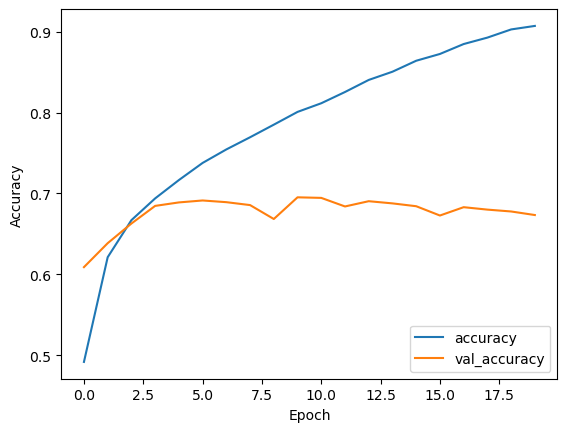

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix &  Classification Report

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


y_pred = model.predict(X_test)
y_pred_classes = tf.argmax(y_pred, axis=1)
y_test_classes = tf.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print('\nConfusion Matrix:')
print(conf_matrix)
print()
print("*"*100)

class_report = classification_report(y_test_classes, y_pred_classes)
print('\n\nClassification Report:')
print(class_report)


313/313 [==============================] - 4s 13ms/step

Confusion Matrix:
[[710  33  32  36  31   6  14  16  71  51]
 [ 19 787   4  10   5   2  16   4  34 119]
 [ 72   8 475 106  97  73  92  43  16  18]
 [ 26  12  48 520  67 143  87  43  22  32]
 [ 23   6  52  83 627  34  83  74   8  10]
 [ 12  10  42 236  59 512  48  63   8  10]
 [  6   9  27  64  36  19 814   7   8  10]
 [ 19   4  19  54  70  55  15 735   2  27]
 [ 85  52   6  21  14   2  14   8 764  34]
 [ 34  88   5  11   9   8  13  15  28 789]]
****************************************************************************************************


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1000
           1       0.78      0.79      0.78      1000
           2       0.67      0.47      0.56      1000
           3       0.46      0.52      0.49      1000
           4       0.62      0.63      0.62      1000
           5       0.60      0.51      0.55

# Save the model for deployment

In [35]:
model.save('image_classification_model.h5')

C:\Users\vamsi\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
